<a href="https://colab.research.google.com/github/gilderson/challenge-python/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [242]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
# Faturamento por loja
lojas = [loja, loja2, loja3, loja4]
faturamento = []
for i in lojas:
  faturamento.append(float(i['Preço'].sum()))

lojas_faturamento = pd.DataFrame(faturamento, columns=['Faturamento'], index=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])
display(lojas_faturamento)

,Faturamento
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


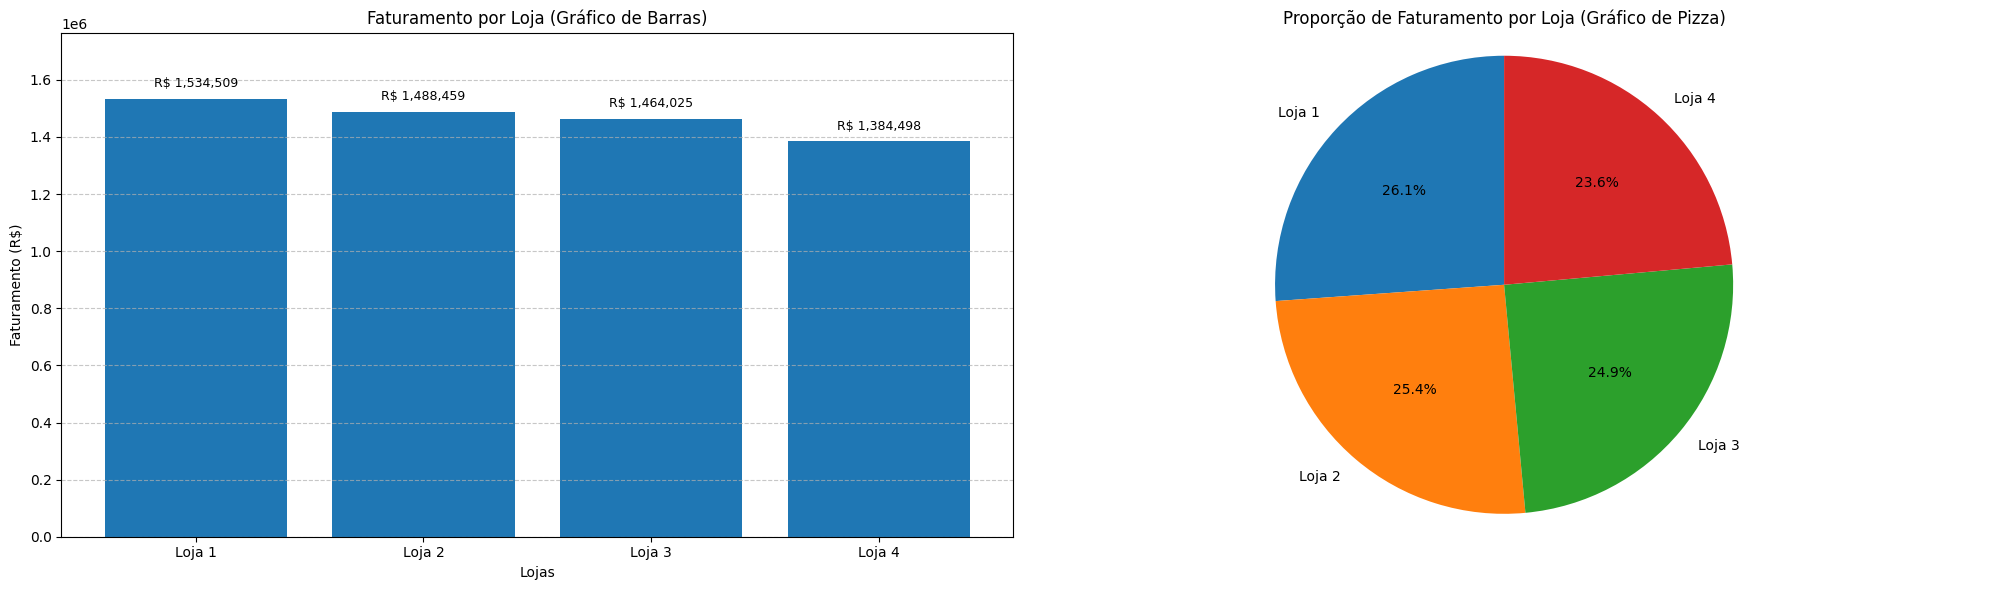

In [ ]:
# Gráfico de vendas por lojas

import matplotlib.pyplot as plt

import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].bar(lojas_faturamento.index, lojas_faturamento['Faturamento'])
axs[0].set_title('Faturamento por Loja (Gráfico de Barras)')
axs[0].set_xlabel('Lojas')
axs[0].set_ylabel('Faturamento (R$)')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
for i, valor in enumerate(lojas_faturamento['Faturamento']):
    axs[0].text(i, valor * 1.02, f'R$ {valor:,.0f}', ha='center', va='bottom', fontsize=9)
axs[0].set_ylim(0, max(lojas_faturamento['Faturamento']) * 1.15)


axs[1].pie(lojas_faturamento['Faturamento'], labels=lojas_faturamento.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Proporção de Faturamento por Loja (Gráfico de Pizza)')
axs[1].axis('equal')

plt.tight_layout()

plt.show()

# 2. Vendas por Categoria


In [ ]:
# 2. Vendas por Categoria

# Concatenate all dataframes
all_lojas = pd.concat(lojas, ignore_index=False)

# Group by 'Categoria do Produto' and sum the 'Preço'
vendas_por_categoria = all_lojas.groupby('Categoria do Produto')['Preço'].sum()

display(vendas_por_categoria)

,Preço
Categoria do Produto,
brinquedos,98140.86
eletrodomesticos,1766337.03
eletronicos,2214099.72
esporte e lazer,190635.39
instrumentos musicais,465029.67
livros,50260.74
moveis,1010214.00
utilidades domesticas,76773.38



Vendas por Categoria na Loja 1:


,Preço
Categoria do Produto,
brinquedos,23993.78
eletrodomesticos,484913.36
eletronicos,572659.23
esporte e lazer,52387.55
instrumentos musicais,121731.69
livros,11713.92
moveis,250178.11
utilidades domesticas,16931.48


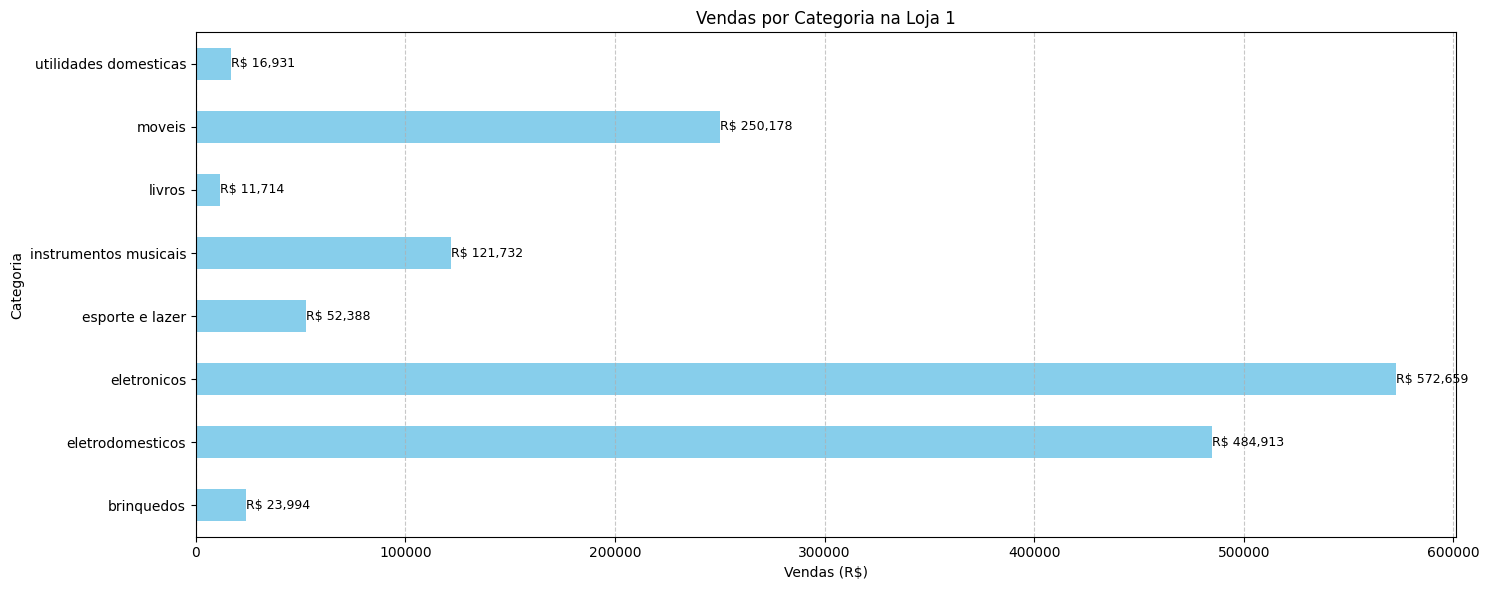


Vendas por Categoria na Loja 2:


,Preço
Categoria do Produto,
brinquedos,21262.21
eletrodomesticos,464758.13
eletronicos,547773.71
esporte e lazer,46326.09
instrumentos musicais,139987.03
livros,13454.35
moveis,235234.68
utilidades domesticas,19662.86


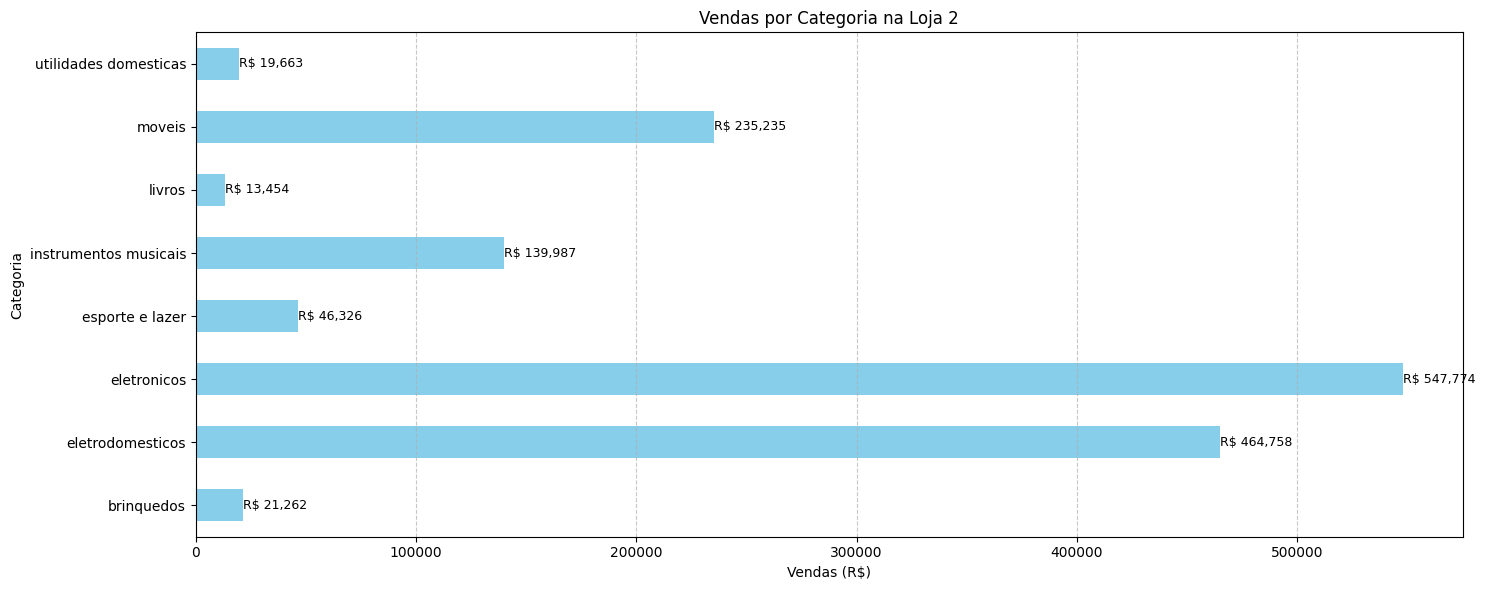


Vendas por Categoria na Loja 3:


,Preço
Categoria do Produto,
brinquedos,25869.20
eletrodomesticos,438984.89
eletronicos,547699.92
esporte e lazer,47456.10
instrumentos musicais,103174.45
livros,12664.70
moveis,268095.56
utilidades domesticas,20080.21


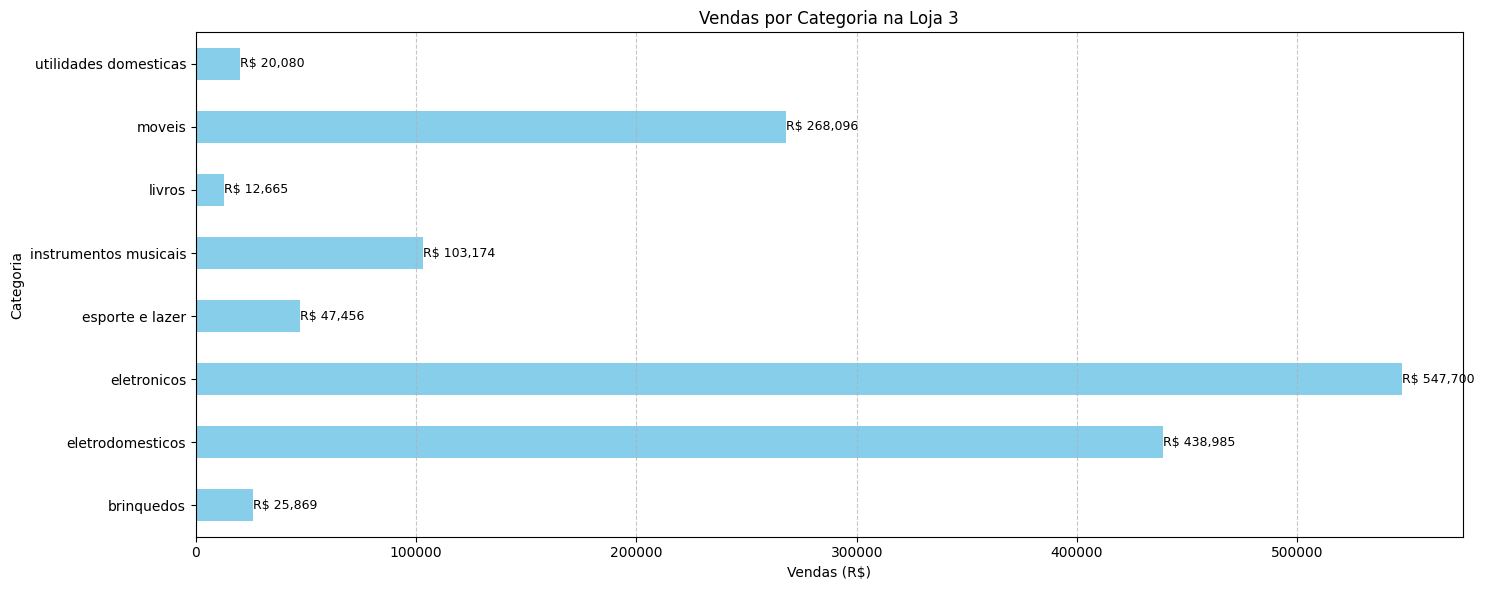


Vendas por Categoria na Loja 4:


,Preço
Categoria do Produto,
brinquedos,27015.67
eletrodomesticos,377680.65
eletronicos,545966.86
esporte e lazer,44465.65
instrumentos musicais,100136.50
livros,12427.77
moveis,256705.65
utilidades domesticas,20098.83


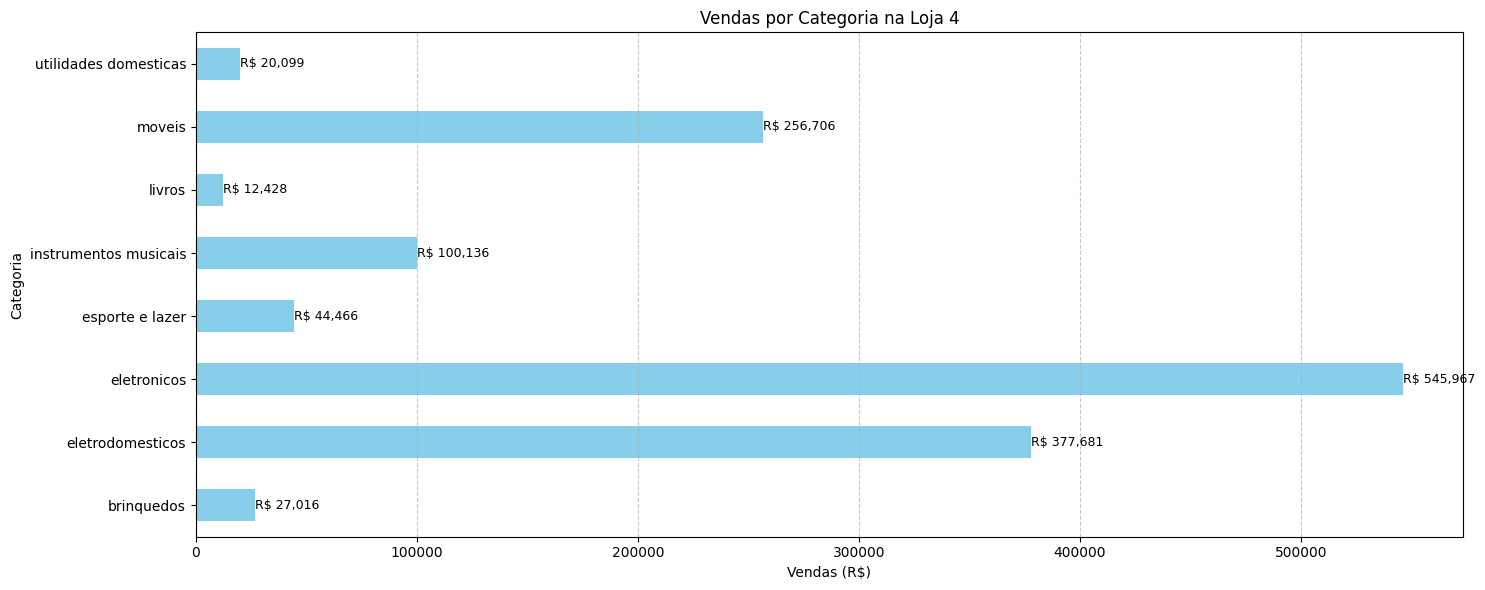

In [164]:
categoria = []
for i in lojas:
  categoria.append(i['Categoria do Produto'].unique().tolist())

lojas_categoria = pd.DataFrame({'Categoria': categoria}, index=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])

preco = []
for i in lojas:
  preco.append(i['Preço'].sum())

lojas_preco = pd.DataFrame({'Preço': preco}, index=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])

# Filtrar e mostrar vendas por categoria para cada loja
vendas_por_categoria_lojas = {}
for i, loja_df in enumerate(lojas):
    loja_nome = f'Loja {i+1}'
    vendas_por_categoria_lojas[loja_nome] = loja_df.groupby('Categoria do Produto')['Preço'].sum()

# Exibir as vendas por categoria para cada loja
for loja_nome, vendas_categoria in vendas_por_categoria_lojas.items():
    print(f"\nVendas por Categoria na {loja_nome}:")
    display(vendas_categoria)

# Gerando os gráficos
    fig = plt.figure(figsize=(15, 6))
    vendas_categoria.plot(kind='barh', color='skyblue')
    plt.title(f'Vendas por Categoria na {loja_nome}')
    plt.xlabel('Vendas (R$)')
    plt.ylabel('Categoria')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Adicionar rótulos de valor nas barras
    for index, value in enumerate(vendas_categoria):
          plt.text(value, index, f'R$ {value:,.0f}', ha='left' , va='center', fontsize=9)

    plt.tight_layout()
    plt.show()



# 3. Média de Avaliação das Lojas

In [ ]:
# Avaliando o nivel de satisfaçã das compras por loja

avaliacao = []
for i in lojas:
  avaliacao.append(round(float(i['Avaliação da compra'].mean()),2))
lojas_ava = pd.DataFrame(avaliacao, columns=['Avaliação'], index=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])

display(lojas_ava)


,Avaliação
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


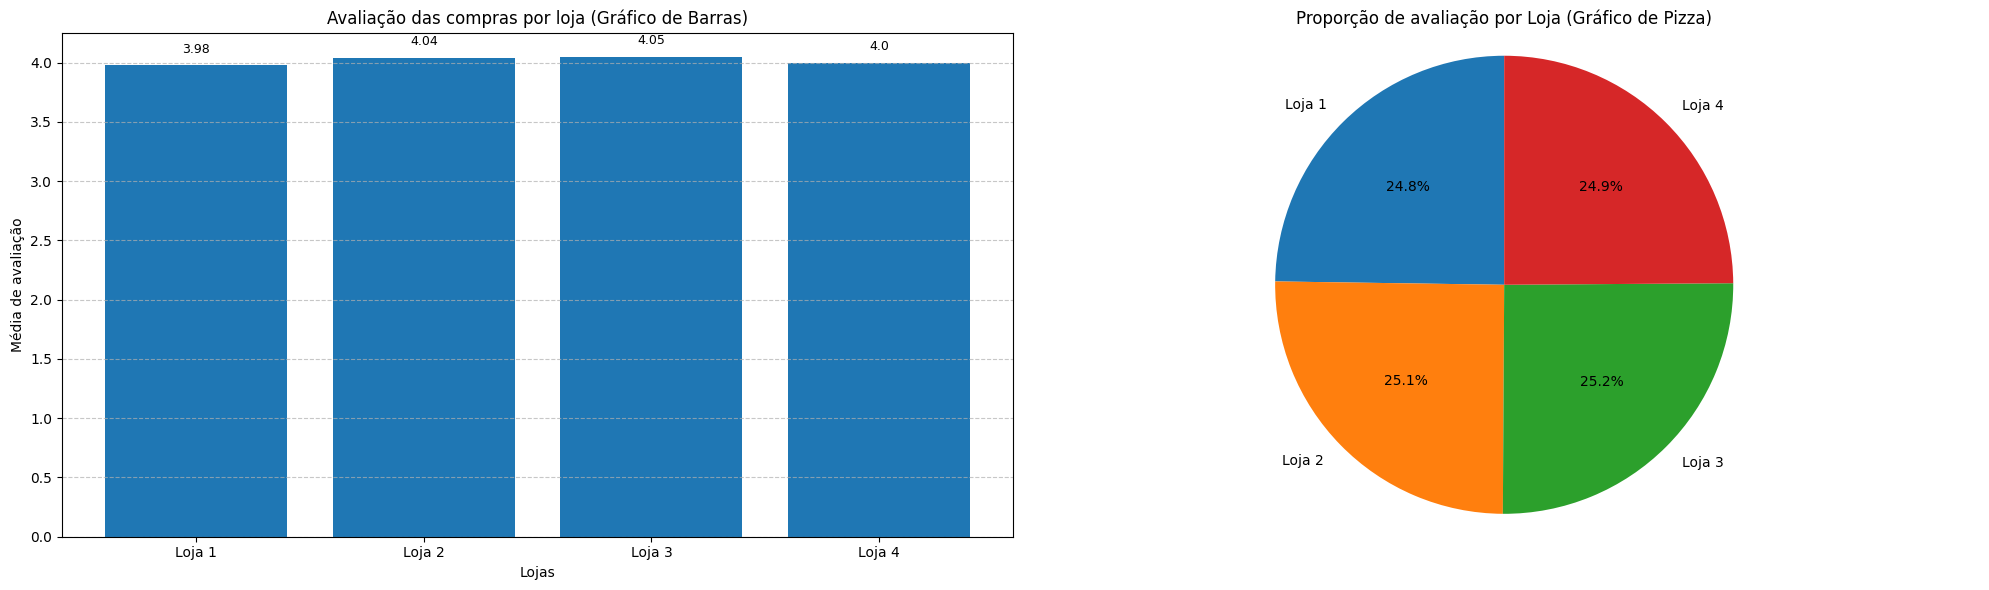

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].bar(lojas_ava.index, lojas_ava['Avaliação'])
axs[0].set_title('Avaliação das compras por loja (Gráfico de Barras)')
axs[0].set_xlabel('Lojas')
axs[0].set_ylabel('Média de avaliação')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
for i, valor in enumerate(lojas_ava['Avaliação']):
    axs[0].text(i, valor * 1.02, f'{valor}', ha='center', va='bottom', fontsize=9)



axs[1].pie(lojas_ava['Avaliação'], labels=lojas_ava.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Proporção de avaliação por Loja (Gráfico de Pizza)')
axs[1].axis('equal')

plt.tight_layout()

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produtos = []
for i in lojas:
  produtos.append(i['Produto'].unique().tolist())

lojas_produtos = pd.DataFrame({'Produtos': produtos}, index=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])

produtos_vendidos = []
for i in lojas:
  produtos_vendidos.append(i['Produto'].value_counts())

lojas_produtos_vendidos = pd.DataFrame(produtos_vendidos, index=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])

# Encontrar o produto mais vendido em cada loja
produto_mais_vendido_por_loja = lojas_produtos_vendidos.idxmax(axis=1)
produto_menos_vendido_por_loja = lojas_produtos_vendidos.idxmin(axis=1)
print("Produto mais vendido por loja:")
print(produto_mais_vendido_por_loja)


Produto mais vendido por loja:
Loja 1                 Micro-ondas
Loja 2    Iniciando em programação
Loja 3               Kit banquetas
Loja 4                    Cama box
dtype: object


In [ ]:
print("Produto menos vendido por loja:")
print(produto_menos_vendido_por_loja)

Produto menos vendido por loja:
Loja 1              Headset
Loja 2    Jogo de tabuleiro
Loja 3     Blocos de montar
Loja 4             Guitarra
dtype: object



Top 5 Produtos Mais Vendidos na Loja 1:


,Produto
Produto,
Guarda roupas,60
Micro-ondas,60
TV Led UHD 4K,60
Secadora de roupas,58
Blocos de montar,56


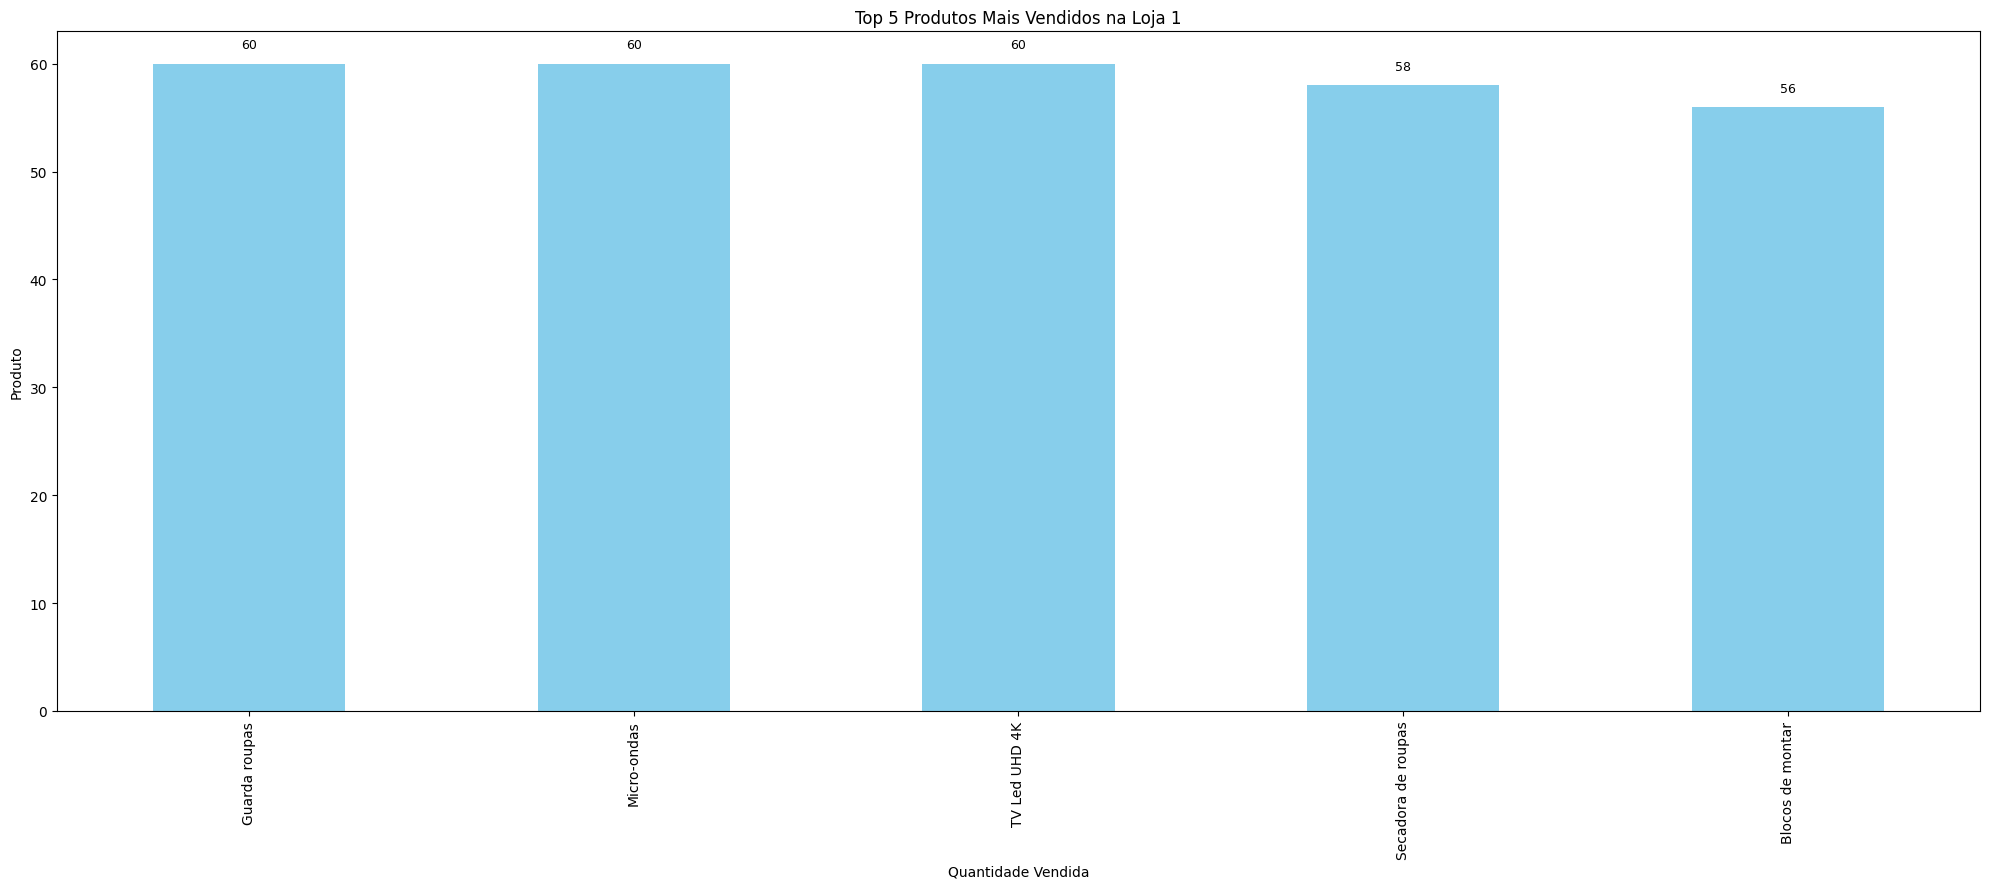


Top 5 Produtos Mais Vendidos na Loja 2:


,Produto
Produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61
Pandeiro,58
Violão,58


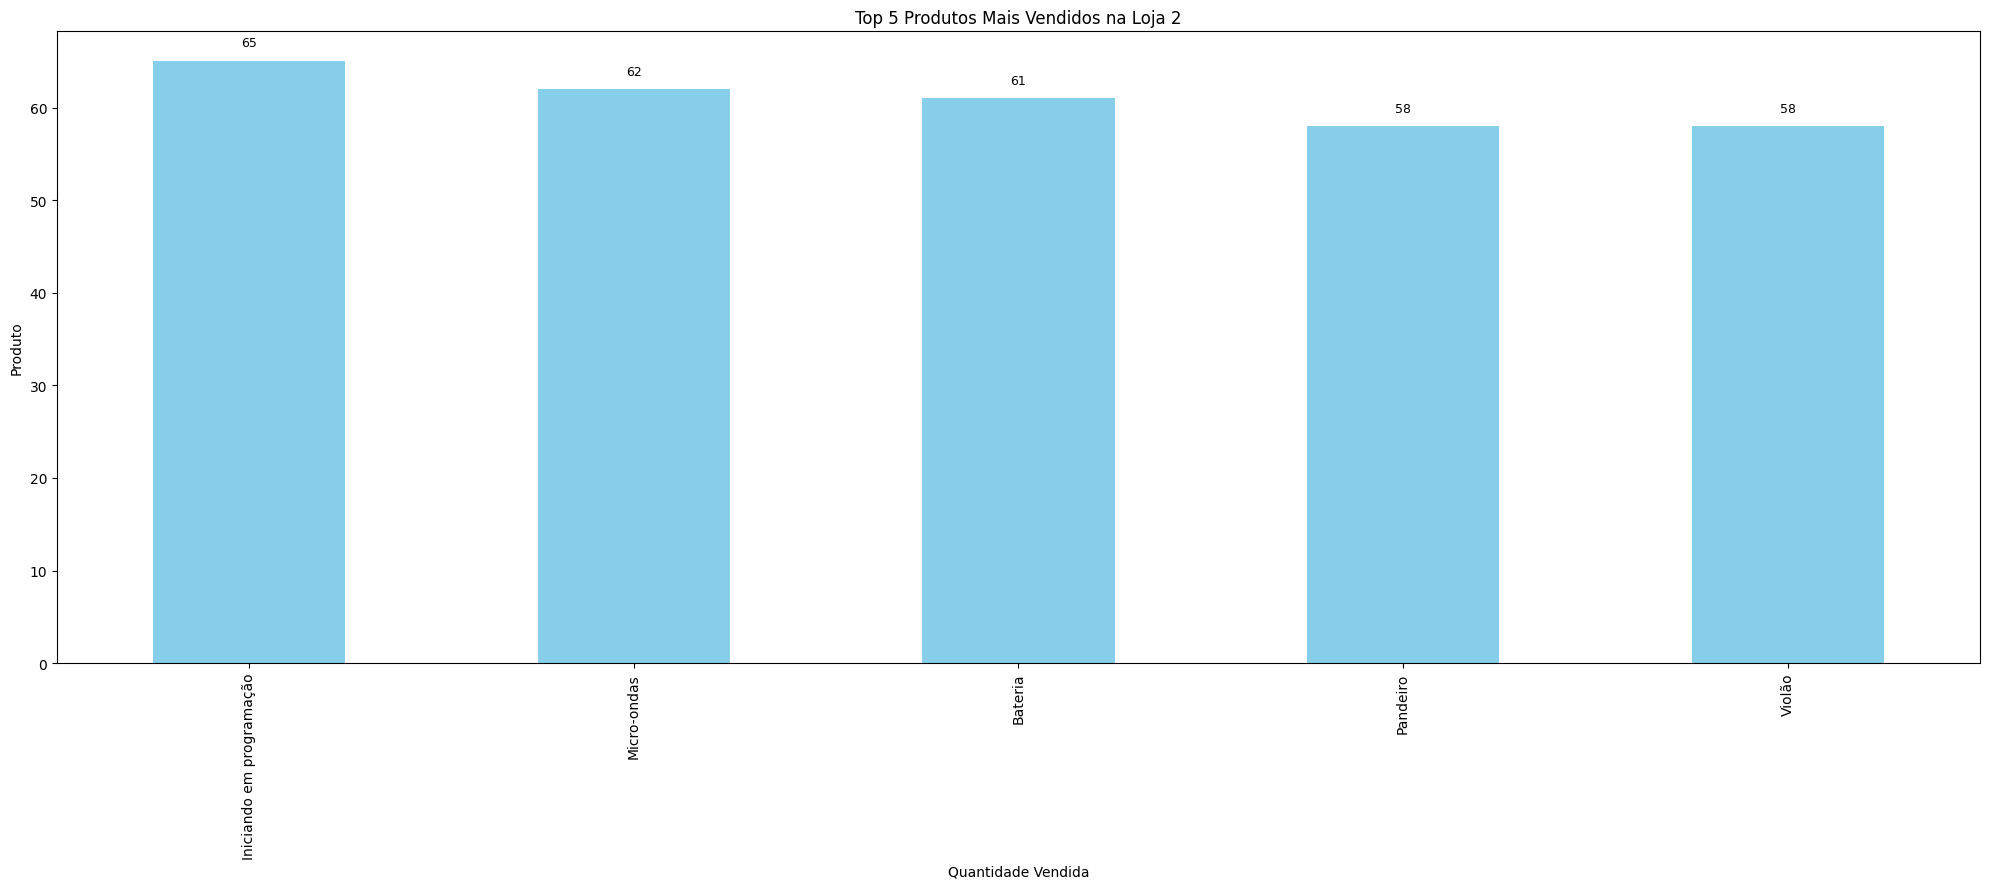


Top 5 Produtos Mais Vendidos na Loja 3:


,Produto
Produto,
Kit banquetas,57
Cama king,56
Mesa de jantar,56
Cômoda,55
Jogo de panelas,55


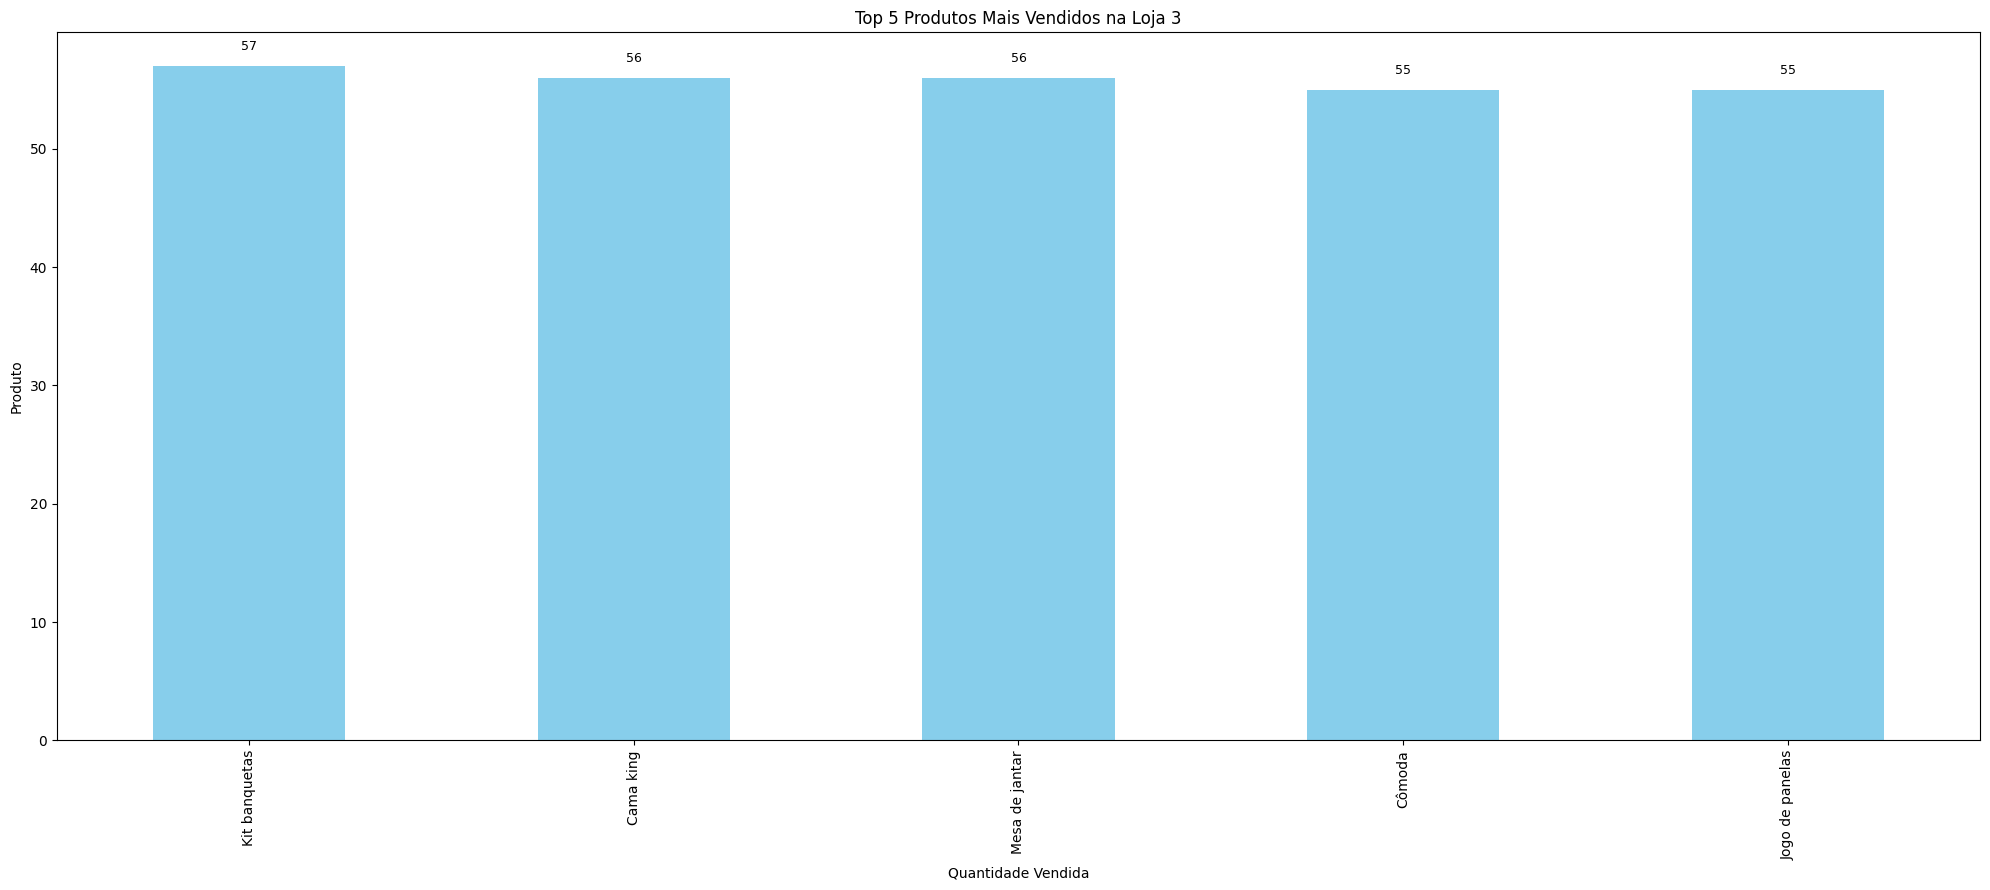


Top 5 Produtos Mais Vendidos na Loja 4:


,Produto
Produto,
Cama box,62
Faqueiro,59
Cama king,56
Dashboards com Power BI,56
Carrinho controle remoto,55


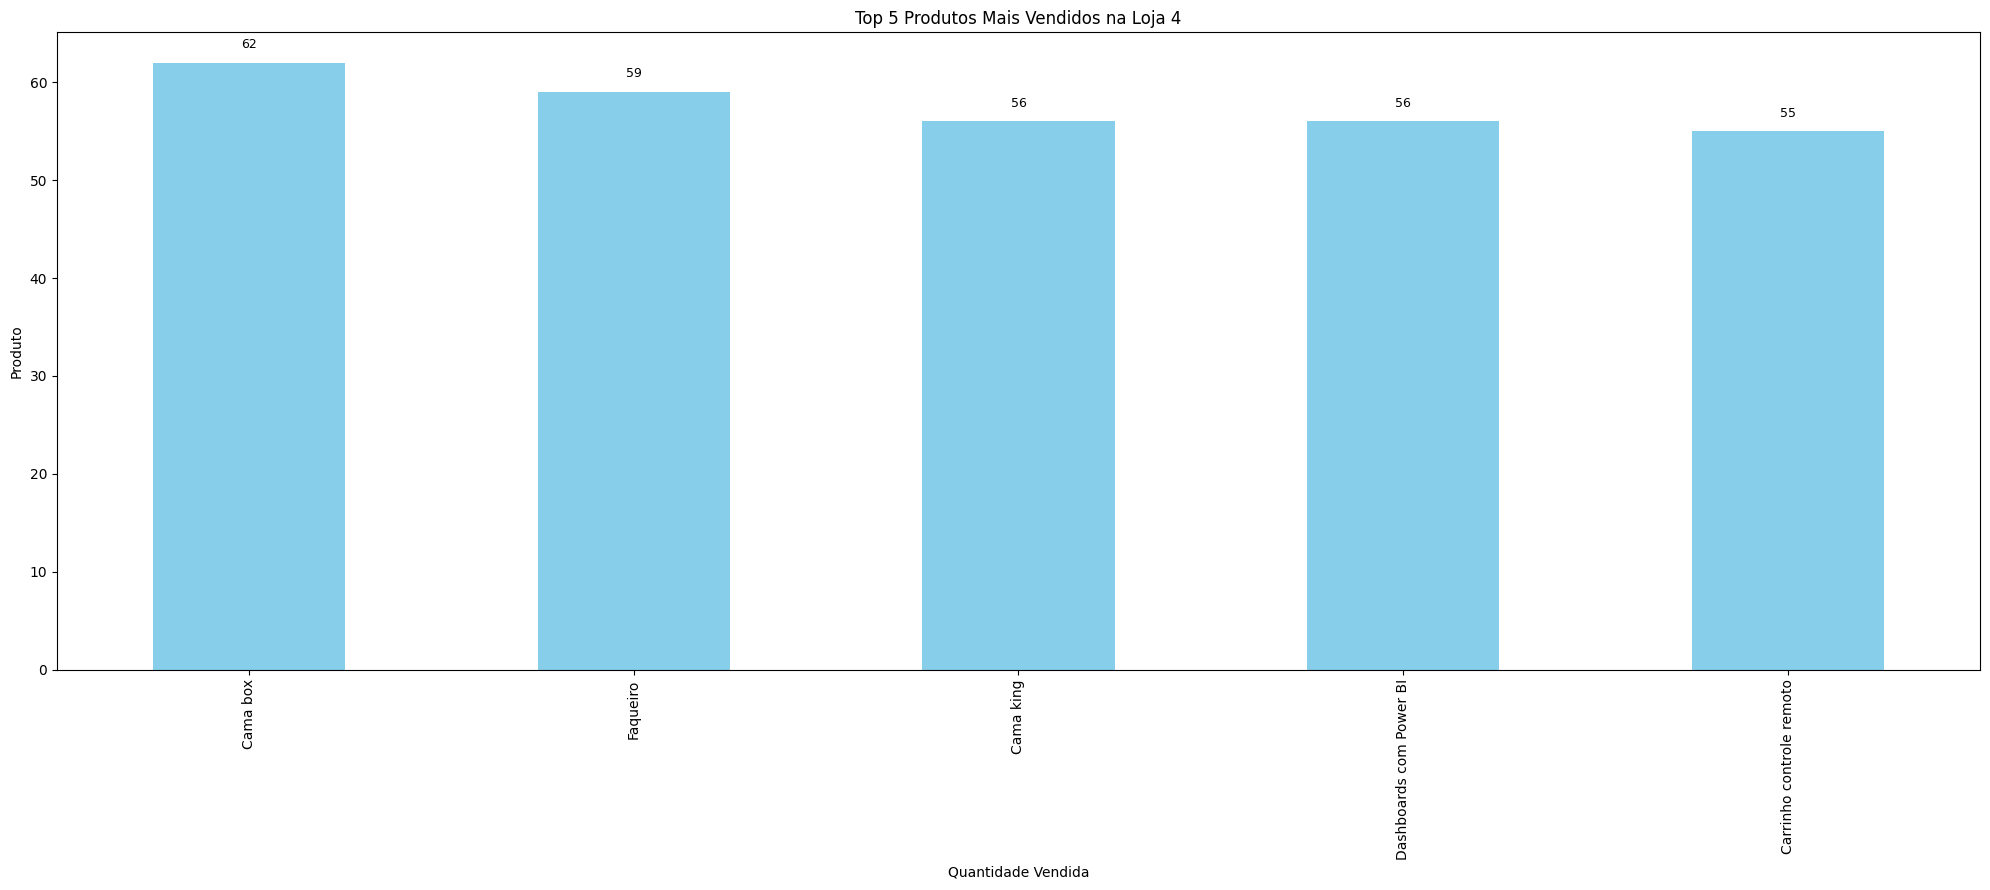

In [140]:
top_5_produtos_por_loja = {}

for i, loja_df in enumerate(lojas):
    loja_nome = f'Loja {i+1}'
    # Calcular o total de vendas por produto para a loja atual
    vendas_por_produto_loja = loja_df.groupby('Produto')['Produto'].count()

    # Obter os 5 produtos mais vendidos para a loja atual
    top_5_loja = vendas_por_produto_loja.nlargest(5)

    top_5_produtos_por_loja[loja_nome] = top_5_loja

# Exibir os top 5 produtos para cada loja
for loja_nome, top_5 in top_5_produtos_por_loja.items():
    print(f"\nTop 5 Produtos Mais Vendidos na {loja_nome}:")
    display(top_5)

    fig = plt.figure(figsize=(20, 9))
    ax = top_5.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    for i, valor in enumerate(top_5.values):
        ax.text(i, valor * 1.02, f'{valor}', ha='center', va='bottom', fontsize=9)
    plt.title(f'Top 5 Produtos Mais Vendidos na {loja_nome}')
    plt.xlabel('Quantidade Vendida')
    plt.ylabel('Produto')
    plt.tight_layout()
    plt.show()


Top 5 Produtos Mais Vendidos na Loja 1:


,Produto
Produto,
Celular ABXY,33
Headset,33
Panela de pressão,35
Pandeiro,36
Ciência de dados com python,39


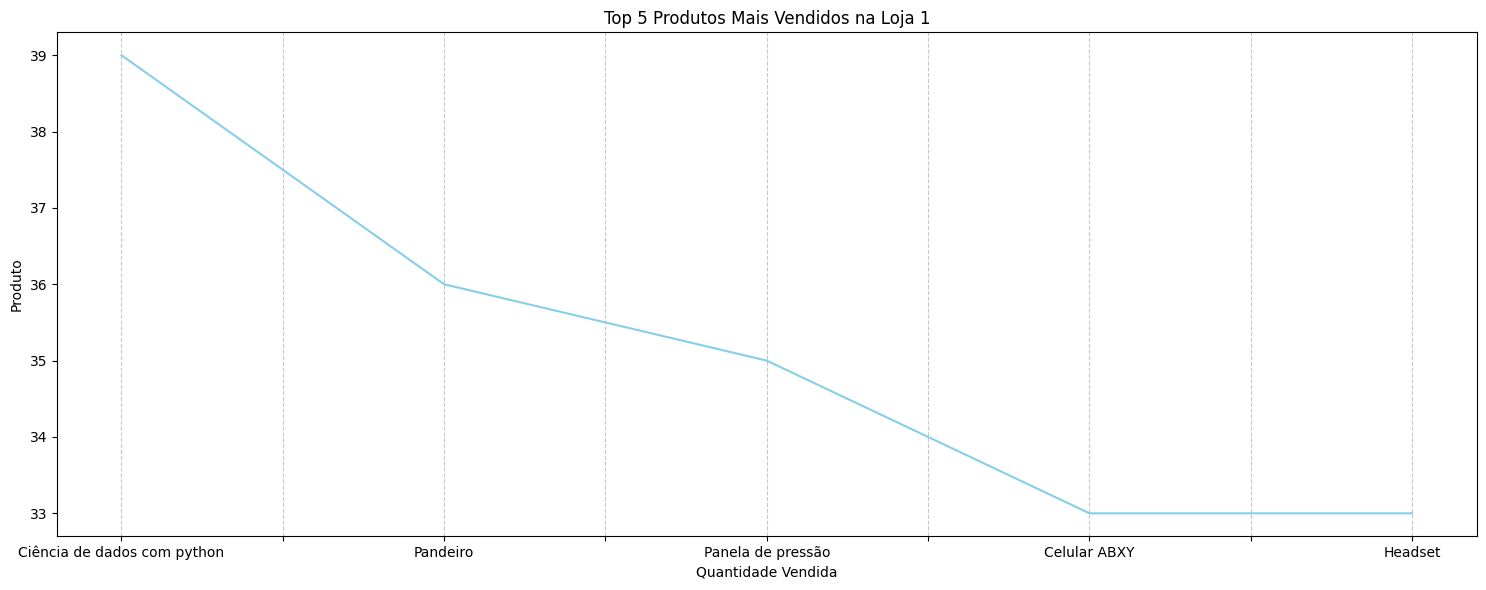


Top 5 Produtos Mais Vendidos na Loja 2:


,Produto
Produto,
Jogo de tabuleiro,32
Impressora,34
Mesa de jantar,34
Poltrona,35
Fone de ouvido,37


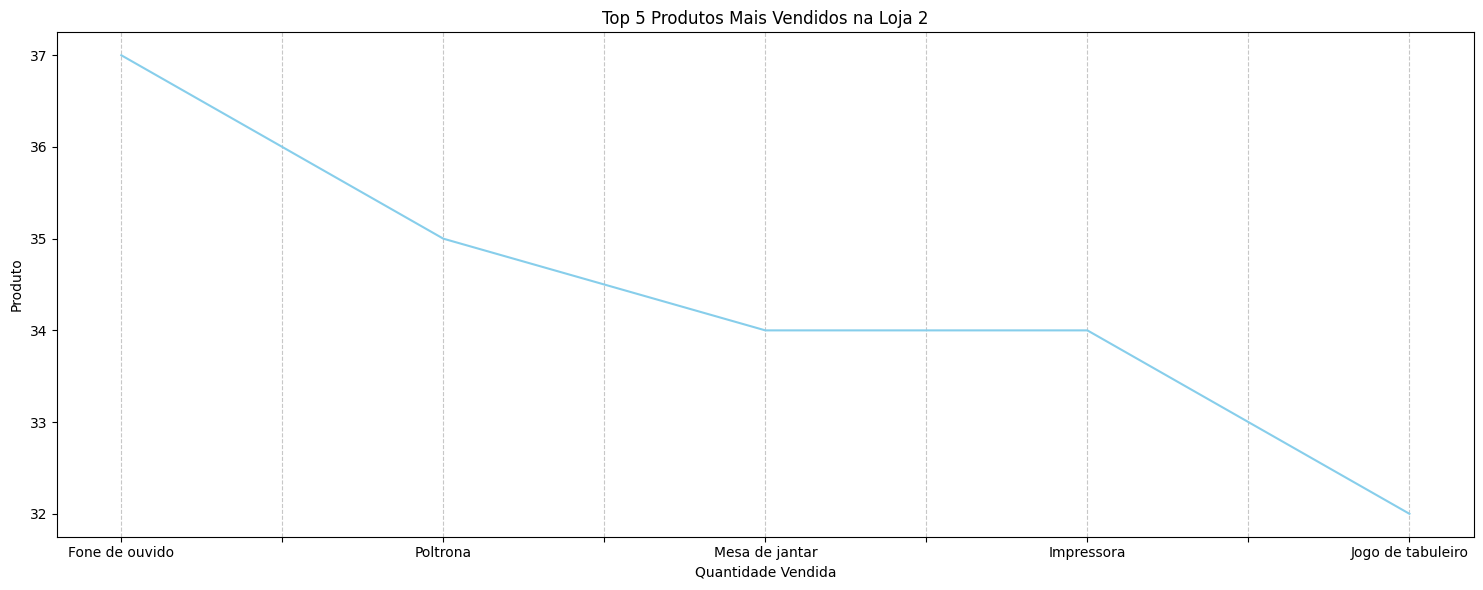


Top 5 Produtos Mais Vendidos na Loja 3:


,Produto
Produto,
Blocos de montar,35
Jogo de copos,36
Micro-ondas,36
Mochila,36
Copo térmico,38


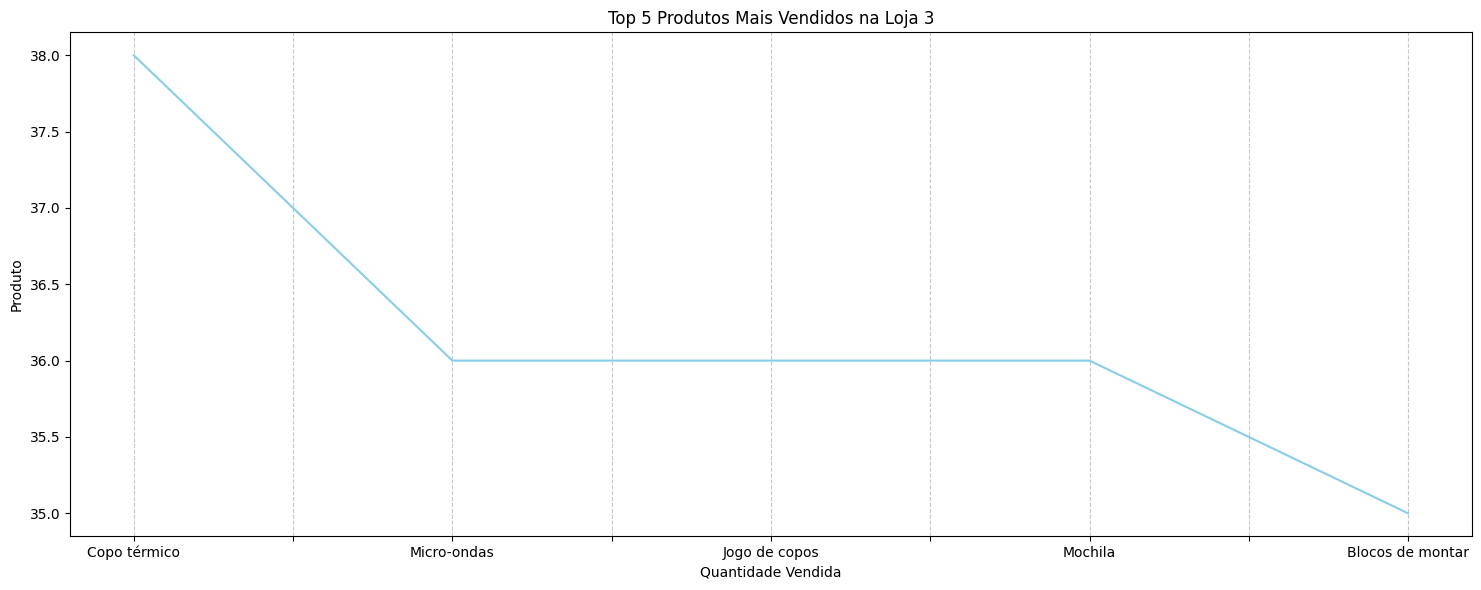


Top 5 Produtos Mais Vendidos na Loja 4:


,Produto
Produto,
Guitarra,33
Guarda roupas,34
Violão,37
Ciência de dados com python,38
Geladeira,38


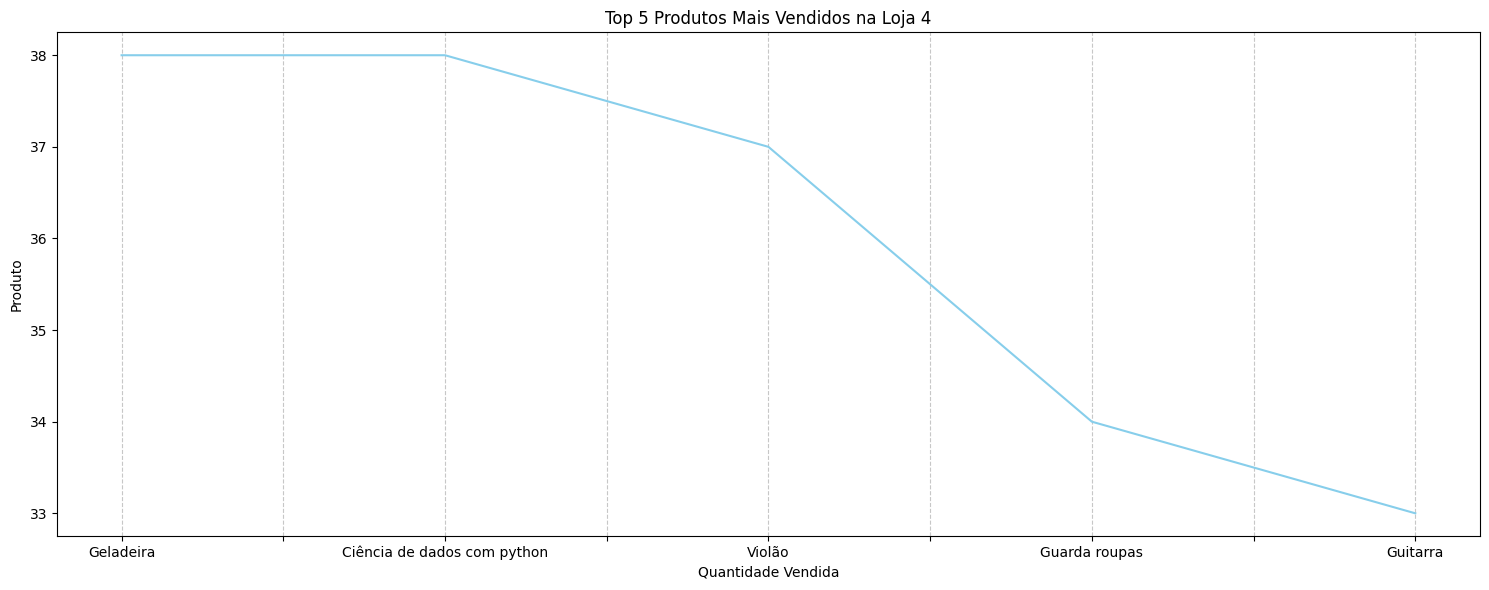

In [312]:
down_5_produtos_por_loja = {}

for i, loja_df in enumerate(lojas):
    loja_nome = f'Loja {i+1}'
    # Calcular o total de vendas por produto para a loja atual
    menos_vendas_por_produto_loja = loja_df.groupby('Produto')['Produto'].count()

    # Obter os 5 produtos mais vendidos para a loja atual
    produtos_menos_vendido = menos_vendas_por_produto_loja.nsmallest(5)

    down_5_produtos_por_loja[loja_nome] = produtos_menos_vendido

# Exibir os top 5 produtos para cada loja
for loja_nome, down_5 in down_5_produtos_por_loja.items():
    print(f"\nTop 5 Produtos Mais Vendidos na {loja_nome}:")
    display(down_5)

    fig = plt.figure(figsize=(15, 6))
    ax = down_5.sort_values(ascending=False).plot(kind='line', color='skyblue')
    plt.title(f'Top 5 Produtos Mais Vendidos na {loja_nome}')
    plt.xlabel('Quantidade Vendida')
    plt.ylabel('Produto')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 5. Frete Médio por Loja


In [114]:
frete = []
for i in lojas:
  frete.append(round(float(i['Frete'].mean()),2))
frete_por_loja = pd.DataFrame(frete, columns=['Frete'], index=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])

display(frete_por_loja)

,Frete
Loja 1,34.69
Loja 2,33.62
Loja 3,33.07
Loja 4,31.28


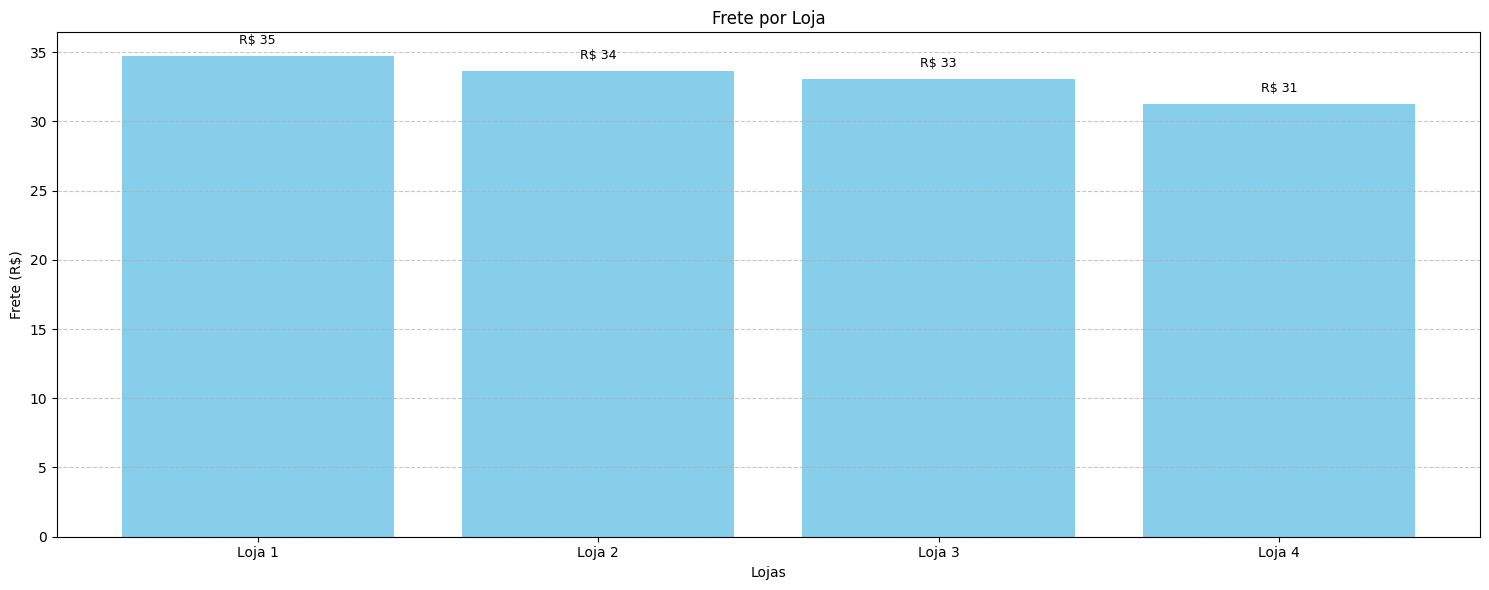

In [144]:
plt.figure(figsize=(15, 6))
plt.bar(frete_por_loja.index, frete_por_loja['Frete'], color='skyblue')
plt.title('Frete por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, valor in enumerate(frete_por_loja['Frete']):
    plt.text(i, valor * 1.02, f'R$ {valor:,.0f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()

plt.show()

# Relatório de desempenho

Este relatório tem por objetivo avaliar o desempenho das lojas com base em alguns critérios, como faturamento, produtos mais e menos vendido, avaliações de compras.

De acordo com os dados, a loja 4 tem menor desempenho no geral, suas vendas são de itens de menor valor agregado, sua qualificação está empatada com a loja 1, porém essa tem mais valume de vendas e com um  valor agregado maior, necessário atenção para melhorar qualificação, mas esta dentro de uma média aceitavel.

Em virtudes dos valores mostrados, a loja 4 é a melhor opçõa para venda e assim investir em um novo empreendimento e até nas proprias lojas sobressalentes
